In [1]:
import os
import numpy as np
import pandas as pd

import wordcloud
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
os.getcwd()

'C:\\Users\\chuat\\Documents\\GitHub\\Bruno-Mars'

In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Data Analysis (Part 1).ipynb',
 'Data Collection.ipynb',
 'Data Preprocessing.ipynb',
 'nrcLexicon.txt',
 'preprocessed_data (version 1).csv',
 'preprocessed_data (version 2).csv',
 'raw_data.csv',
 'README.md']

In [4]:
data=pd.read_csv("preprocessed_data (version 2).csv")
data

,Album,Lyrics
0,Doo-Wops & Hooligans,easy come easy go live oh take take take never...
1,Unorthodox Jukebox,spend money big old fancy car brighteyed honey...
2,XX4K,tonight want take higher throw hand sky let u ...


In [5]:
data1=pd.read_csv("preprocessed_data (version 1).csv")
data1.head()

,Song Title,Raw Data,Preprocessed,Album
0,Grenade,"[Verse 1]\nEasy come, easy go, that's just how...",easy come easy go live oh take take take never...,Doo-Wops & Hooligans
1,Just the Way You Are,"[Verse 1]\nOh, her eyes, her eyes\nMake the st...",oh eye eye make star look like shinin hair hai...,Doo-Wops & Hooligans
2,Our First Time,"[Refrain]\nDon't it feel good, babe?\nDon't it...",feel good babe feel good baby brand new babe b...,Doo-Wops & Hooligans
3,Runaway Baby,"[Intro]\nOh yes\n\n[Verse 1]\nWell, looky here...",oh yes well looky looky ah another pretty thin...,Doo-Wops & Hooligans
4,Lazy Song,"[Chorus]\nToday, I don't feel like doing anyth...",today feel like anything want lay bed feel lik...,Doo-Wops & Hooligans


## I. Word Frequencies

In [6]:
albums=data["Album"].tolist()
lyrics=data["Lyrics"].tolist()
labels= [[x, y] for x, y in zip(albums, lyrics)]

def mostCommonWords(text,n,albumName):
    count=Counter(text.split())
    x=pd.DataFrame.from_dict(count, orient='index').reset_index()
    x.columns=[albumName,"Frequency"]
    x=x.sort_values("Frequency",ascending=False)
    x=x.iloc[0:n,:].reset_index(drop=True)
    return x
y=[mostCommonWords(i,20,j) for j,i in labels]
df=pd.concat(y,axis=1)
df

,Doo-Wops & Hooligans,Frequency,Unorthodox Jukebox,Frequency,XX4K,Frequency
0,yeah,65,yeah,95,got,62
1,I,57,I,36,baby,50
2,go,46,oh,35,girl,46
3,baby,42,got,34,like,43
4,run,33,show,34,I,40
5,know,28,make,33,straight,37
6,would,27,give,32,going,35
7,oh,24,money,31,oh,34
8,get,24,like,31,know,32
9,away,23,girl,29,u,24


The table above shows the top 20 most frequent words in each album. Notice that they share many common words, such that keeping them in my corpus serves no purpose. To decrease noise, these words will be removed.

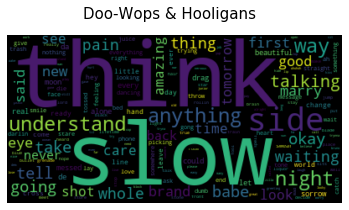

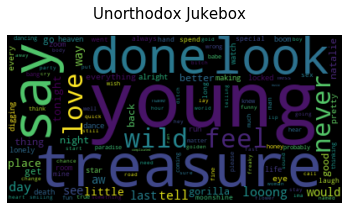

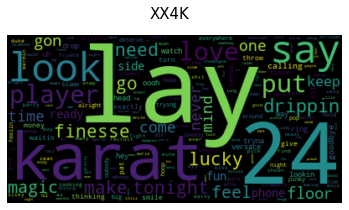

[None, None, None]

In [7]:
def removeCommonWords(text,reference):
    index=df.iloc[:,reference].tolist() + ["oh","ooh","ohoh","ya","yea","yes","u"]
    tokens=word_tokenize(text)
    newLyrics=[i for i in tokens if i not in index]
    newLyrics=" ".join(newLyrics)
    return newLyrics
lyrics=[removeCommonWords(i,j) for i,j in zip(lyrics,[0,2,4])]
data["Lyrics"]=lyrics

labels1= [[x, y] for x, y in zip(albums, lyrics)]
wordcloud = WordCloud()

def wordCloud(album,label):
    i=Counter(album.split())
    df=pd.DataFrame.from_dict(i, orient='index').reset_index()
    z = {}
    for x,y in df.values:
        z[x] = y
    wordcloud.generate_from_frequencies(frequencies=z)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.figtext(0.5, 0.85,label,horizontalalignment="center",fontsize=15)
    plt.show()

[wordCloud(i,j) for j,i in labels1]

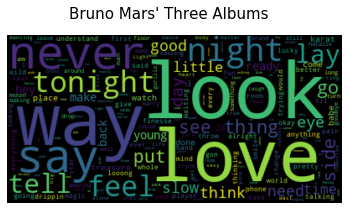

In [8]:
wordCloud(" ".join(lyrics),"Bruno Mars' Three Albums")

## II. Sentiment Analysis

In [9]:
#nltk.download('vader_lexicon')
sid=SentimentIntensityAnalyzer()
scores=[sid.polarity_scores(i) for i in data1["Preprocessed"].tolist()]
sentimentAnalysisResults=pd.concat([data1[["Song Title","Album"]],pd.DataFrame(scores)],axis=1)
sentimentAnalysisResults

,Song Title,Album,neg,neu,pos,compound
0,Grenade,Doo-Wops & Hooligans,0.132,0.472,0.396,0.9965
1,Just the Way You Are,Doo-Wops & Hooligans,0.140,0.493,0.367,0.9908
2,Our First Time,Doo-Wops & Hooligans,0.059,0.689,0.252,0.9880
3,Runaway Baby,Doo-Wops & Hooligans,0.083,0.583,0.334,0.9964
4,Lazy Song,Doo-Wops & Hooligans,0.098,0.532,0.370,0.9950
5,Marry You,Doo-Wops & Hooligans,0.068,0.532,0.400,0.9958
6,Talking to the Moon,Doo-Wops & Hooligans,0.197,0.638,0.165,-0.7003
7,Liquor Store Blues,Doo-Wops & Hooligans,0.260,0.548,0.191,-0.9725
8,The Other Side,Doo-Wops & Hooligans,0.087,0.657,0.257,0.9757
9,Young Girls,Unorthodox Jukebox,0.213,0.599,0.188,-0.9186


In [10]:
summary=sentimentAnalysisResults.groupby("Album").agg({"neg":"mean","pos":"mean","compound":"mean"}).reset_index()
summary=summary.rename(columns={"neg":"Mean Negative Score","pos":"Mean Positive Score","compound":"Mean Compound Score"})
summary.round(2)

,Album,Mean Negative Score,Mean Positive Score,Mean Compound Score
0,Doo-Wops & Hooligans,0.12,0.30,0.59
1,Unorthodox Jukebox,0.08,0.36,0.80
2,XX4K,0.07,0.29,0.81


Given the same mean compound scores, *Unorthodox Jukebox* and *XX4K* seem to be significantly more positive than Bruno Mars' first album. However, note that most songs are strongly positive to begin with; a few "negative" songs in *Doo-Wops & Hooligans* artifically deflate the album's overall positive sentiment. On average, the positive score is relatively uniform across all three albums.

The NRC lexicon will be used to derive more insightful sentiment than simply positive and negative.